## ANALISIS DATA TRANSJAKARTA ##

## **Pendahuluan**

#  Latar Belakang
Transjakarta adalah perusahaan transportasi umum dari Indonesia yang berbasis di Jakarta. Moda transportasi yang tersedia adalah bus besar (BRT), bus sedang dan bus besar (non-BRT), bus mini (Mikrotrans). Mekanisme di Transjakarta adalah dengan Tap-In dan Tap-Out menggunakan kartu pembayaran sebagai tiket Anda. Layanan ini dirancang untuk menyediakan transportasi publik yang efisien dan nyaman bagi penduduk Jakarta. Dalam upaya untuk meningkatkan pelayanan dan efisiensi operasional, analisis data perjalanan Transjakarta dapat memberikan wawasan berharga yang dapat membantu dalam pengambilan keputusan bisnis.

# Rumusan Masalah

1. Bagaimana distribusi demografi pengguna Transjakarta?

2. Apa saja pola perjalanan pengguna Transjakarta?

3. Bagaimana rata-rata pembayaran pengguna berdasarkan jenis kelamin dan kelompok usia?


# Tujuan Analisis

Tujuan dari analisis ini adalah untuk memahami berbagai aspek dari data perjalanan Transjakarta, termasuk:

- Demografi pengguna (jenis kelamin, usia, dan bank penerbit kartu).

- Pola perjalanan (jumlah perjalanan per koridor dan durasi perjalanan).

- Analisis pembayaran (rata-rata pembayaran per koridor).

Analisis ini mencakup pembersihan data, analisis deskriptif, dan analisis statistik inferensial untuk memberikan wawasan yang dapat membantu pengambilan keputusan bisnis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
data = pd.read_csv('Transjakarta.csv')

Pada dasarnya data ini adalah simulasi untuk data transaksi di Transjakarta, berisi 22 kolom yaitu:

1.	transID: Id transaksi unik untuk setiap transaksi
2.	payCardID: Pengenal utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket masuk dan keluar.
3.	payCardBank: Nama bank penerbit kartu pelanggan
4.	payCardName: Nama pelanggan yang tercantum di dalam kartu.
5.	payCardSex: Jenis kelamin pelanggan yang tertanam dalam kartu
6.	payCardBirthDate: Tahun kelahiran pelanggan
7.	corridorID: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
8.	corridorName: Nama Koridor / Nama Rute berisi Start dan Finish untuk setiap rute.
9.	direction: 0 untuk Pergi, 1 untuk Kembali. Arah dari rute.
10.	tapInStops: Tap In  (pintu masuk) ID Halte untuk mengidentifikasi nama halte
11.	tapInStopsName: Tap In (pintu masuk) Nama Halte tempat pelanggan tap in.
12.	tapInStopsLat: Garis Lintang dari Tap In Halte
13.	tapInStopsLon: Bujur dari Tap In (pintu masuk) Perhentian
14.	stopStartSeq: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
15.	tapInTime: Waktu tap in. Tanggal dan waktu
16.	tapOutStops: Tap Out (Exit) ID Halte untuk mengidentifikasi nama halte
17.	tapOutStopsName: Tap out (exit) Nama Halte tempat pelanggan melakukan tap out.
18.	tapOutStopsLat: Garis Lintang Tap Out (keluar) Pemberhentian
19.	tapOutStopsLon: Bujur dari Tap Out Stops
20.	stopEndSeq:  Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
21.	tapOutTime: Waktu tap out. Tanggal dan waktu
22.	payAmount: Jumlah yang harus dibayar pelanggan. Ada yang gratis. Beberapa tidak.


In [3]:
data.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

# **DATA CLEANING**

In [4]:
data.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

# Tujuan: 
Langkah pertama ini bertujuan untuk mengecek berapa banyak nilai yang hilang (missing values) dalam setiap kolom di dataset.

# Output: 
Tabel yang menunjukkan jumlah nilai yang hilang untuk setiap kolom. Misalnya, kolom payAmount memiliki 1007 nilai yang hilang.

In [5]:
# Mengisi missing values dengan metode yang sesuai
data['payAmount'] = data['payAmount'].fillna(data['payAmount'].mean())
data['payCardBank'] = data['payCardBank'].fillna(data['payCardBank'].mode()[0])
data['tapOutStopsName'] = data['tapOutStopsName'].fillna('Unknown')
data['tapOutStopsLat'] = data['tapOutStopsLat'].fillna(0.0)
data['tapOutStopsLon'] = data['tapOutStopsLon'].fillna(0.0)

# Tujuan:
Mengisi missing values di kolom tertentu dengan metode yang sesuai untuk memastikan data tidak memiliki nilai yang hilang.

# Detail:
- payAmount: Missing values diisi dengan rata-rata (mean) dari kolom tersebut.
- payCardBank: Missing values diisi dengan modus (mode) dari kolom tersebut, yaitu nilai yang paling sering muncul.
- tapOutStopsName: Missing values diisi dengan string 'Unknown'.
- tapOutStopsLat dan tapOutStopsLon: Missing values diisi dengan 0.0.

In [6]:
# Menghapus baris dengan missing values yang tersisa (jika ada)
data_cleaned = data.dropna()

data_cleaned

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


# Tujuan: 
Menghapus baris yang masih memiliki missing values setelah pengisian nilai di langkah sebelumnya. Ini dilakukan untuk memastikan dataset yang bersih tanpa missing values.

# Output: 
Dataset yang telah dibersihkan (data_cleaned), di mana semua missing values telah diisi atau baris yang memiliki missing values telah dihapus.

In [7]:
data_cleaned.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

Langkah-langkah ini bertujuan untuk menangani missing values dalam dataset dengan metode yang sesuai. Mengisi missing values dengan nilai rata-rata, modus, atau nilai default (seperti 'Unknown' atau 0.0) membantu menjaga integritas data dan meminimalkan penghapusan data yang mungkin penting. Setelah semua missing values ditangani, dataset yang bersih (data_cleaned) siap untuk analisis lebih lanjut.

In [8]:
# Mengidentifikasi data duplikat
duplicates = data_cleaned.duplicated().sum()
duplicates

0

In [9]:
# Menghapus data duplikat
data_cleaned = data_cleaned.drop_duplicates()

Di sini kita mengidentifikasi jumlah data yang duplikat dengan duplicated().sum() dan kemudian menghapus data duplikat tersebut dengan drop_duplicates(). Data duplikat dapat menyebabkan analisis yang bias dan tidak akurat.

In [10]:
# Mengubah kolom tanggal menjadi tipe datetime
data_cleaned['tapInTime'] = pd.to_datetime(data_cleaned['tapInTime'])
data_cleaned['tapOutTime'] = pd.to_datetime(data_cleaned['tapOutTime'])

# Menambahkan kolom usia pengguna
data_cleaned['age'] = 2024 - data_cleaned['payCardBirthDate']

Kolom tapInTime dan tapOutTime diubah menjadi tipe data datetime untuk memudahkan perhitungan waktu durasi perjalanan.

Menambahkan kolom age (usia) pengguna dengan menghitung selisih antara tahun saat ini (2024) dengan tahun lahir pengguna (payCardBirthDate).

In [11]:
data_cleaned.dtypes

transID                     object
payCardID                    int64
payCardBank                 object
payCardName                 object
payCardSex                  object
payCardBirthDate             int64
corridorID                  object
corridorName                object
direction                  float64
tapInStops                  object
tapInStopsName              object
tapInStopsLat              float64
tapInStopsLon              float64
stopStartSeq                 int64
tapInTime           datetime64[ns]
tapOutStops                 object
tapOutStopsName             object
tapOutStopsLat             float64
tapOutStopsLon             float64
stopEndSeq                 float64
tapOutTime          datetime64[ns]
payAmount                  float64
age                          int64
dtype: object

In [12]:
# Menghitung durasi perjalanan dalam menit
data_cleaned['trip_duration'] = (data_cleaned['tapOutTime'] - data_cleaned['tapInTime']).dt.total_seconds() / 60

In [13]:
# Memeriksa hasil
print(data_cleaned[['trip_duration']].describe())

       trip_duration
count   32595.000000
mean       72.229937
std        28.069349
min        15.000000
25%        51.166667
50%        72.100000
75%        95.783333
max       179.050000


In [14]:
# Mengidentifikasi outliers menggunakan IQR
Q1 = data_cleaned['payAmount'].quantile(0.25)
Q3 = data_cleaned['payAmount'].quantile(0.75)
IQR = Q3 - Q1

# Mendefinisikan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring outliers
data_cleaned = data_cleaned[(data_cleaned['payAmount'] >= lower_bound) & (data_cleaned['payAmount'] <= upper_bound)]

# Memeriksa hasil setelah menghapus outliers
print(data_cleaned.describe())

          payCardID  payCardBirthDate     direction  tapInStopsLat  \
count  3.106200e+04      31062.000000  31062.000000   31062.000000   
mean   4.100975e+17       1990.017867      0.500419      -6.213541   
min    6.040368e+10       1946.000000      0.000000      -6.394973   
25%    1.800325e+14       1982.000000      0.000000      -6.245863   
50%    3.507251e+15       1990.000000      1.000000      -6.213698   
75%    4.684778e+15       2001.000000      1.000000      -6.173925   
max    4.997694e+18       2012.000000      1.000000      -6.089429   
std    1.299277e+18         13.114910      0.500008       0.058106   

       tapInStopsLon  stopStartSeq                      tapInTime  \
count   31062.000000  31062.000000                          31062   
mean      106.842819     13.922317  2023-04-16 08:00:14.947556352   
min       106.614730      0.000000            2023-04-01 06:22:27   
25%       106.804410      4.000000  2023-04-10 09:18:29.750000128   
50%       106.838660    

Mengidentifikasi outliers pada kolom payAmount menggunakan metode Interquartile Range (IQR) dan kemudian menghapus baris-baris yang berada di luar batas bawah (lower_bound) dan batas atas (upper_bound).

In [15]:
# Menghitung durasi perjalanan dalam menit
data_cleaned['trip_duration'] = (data_cleaned['tapOutTime'] - data_cleaned['tapInTime']).dt.total_seconds() / 60

# Memeriksa hasil
print(data_cleaned[['trip_duration']].describe())

       trip_duration
count   31062.000000
mean       72.133045
std        28.067408
min        15.000000
25%        51.116667
50%        71.966667
75%        95.700000
max       179.050000


## *ANALISIS DESKRIPTIF*

**Demografi Pengguna**

Menganalisis demografi pengguna berdasarkan jenis kelamin dan usia.

In [16]:
# Analisis demografi pengguna berdasarkan jenis kelamin
user_demographics_sex = data_cleaned['payCardSex'].value_counts()
user_demographics_sex


payCardSex
F    16554
M    14508
Name: count, dtype: int64

In [17]:
# Analisis demografi pengguna berdasarkan bank penerbit kartu
user_demographics_bank = data_cleaned['payCardBank'].value_counts()
user_demographics_bank

payCardBank
dki       15415
emoney     5576
brizzi     2797
flazz      2677
online     2378
bni        2219
Name: count, dtype: int64

In [18]:
# Menambahkan kolom usia pengguna
data_cleaned['age'] = 2024 - data_cleaned['payCardBirthDate']

# Statistik deskriptif untuk usia pengguna
age_stats = data_cleaned['age'].describe()
age_stats

count    31062.000000
mean        33.982133
std         13.114910
min         12.000000
25%         23.000000
50%         34.000000
75%         42.000000
max         78.000000
Name: age, dtype: float64

**Analisis Perjalanan**

Menganalisis distribusi perjalanan per koridor dan durasi perjalanan.

In [19]:
# Distribusi perjalanan per koridor
trip_distribution = data_cleaned['corridorName'].value_counts()
trip_distribution

corridorName
Ciputat - CSW                                     350
Harmoni - Jakarta International Stadium           313
Pulo Gadung - Monas                               311
Kampung Rambutan - Pondok Gede                    305
Kalideres - Bundaran HI via Veteran               299
                                                 ... 
Grogol - Pos Pengumben via Slipi                   37
Senen - Tanah Abang                                36
Term. Pulo Gadung - Lampiri                        28
Tanah Abang - Kebayoran Lama via Pos Pengumben     21
Kampung Rambutan - Blok M                          16
Name: count, Length: 206, dtype: int64

In [20]:
# Menghitung durasi perjalanan dalam menit
data_cleaned['trip_duration'] = (data_cleaned['tapOutTime'] - data_cleaned['tapInTime']).dt.total_seconds() / 60

# Statistik deskriptif untuk durasi perjalanan
trip_duration_stats = data_cleaned['trip_duration'].describe()
trip_duration_stats

count    31062.000000
mean        72.133045
std         28.067408
min         15.000000
25%         51.116667
50%         71.966667
75%         95.700000
max        179.050000
Name: trip_duration, dtype: float64

**Analisis Pembayaran**

Menganalisis rata-rata pembayaran per koridor.

In [21]:
# Rata-rata pembayaran per koridor
average_payment_per_corridor = data_cleaned.groupby('corridorName')['payAmount'].mean().reset_index(name='average_payment')
average_payment_per_corridor

,corridorName,average_payment
0,Andara - Stasiun Universitas Pancasila,0.000000
1,BKN - Blok M,2699.712683
2,BSD - Jelambar,3500.000000
3,Batusari - Grogol,3500.000000
4,Bekasi Timur - Cawang,3500.000000
...,...,...
201,Terminal Rawamangun - Cipinang Muara,0.000000
202,Terminal Tanah Merah - Pulo Gadung,0.000000
203,Terminal Tanjung Priok - Ancol Barat,0.000000
204,Tongtek - Tebet Eco Park (TEP) - Cililitan,0.000000


# PERTANYAAN BISNIS DENGAN STATISTIK INFERENSIAL #

1. Koridor mana yang memiliki durasi perjalanan rata-rata yang paling efisien (terpendek) di seluruh jaringan Transjakarta?
Metode: Uji ANOVA

In [22]:
# Identifikasi koridor dengan jumlah data yang cukup
threshold = 50
koridor_counts = data_cleaned['corridorName'].value_counts()
selected_koridors = koridor_counts[koridor_counts >= threshold].index.tolist()

print("Koridor yang dipilih:", selected_koridors)

Koridor yang dipilih: ['Ciputat - CSW', 'Harmoni - Jakarta International Stadium', 'Pulo Gadung - Monas', 'Kampung Rambutan - Pondok Gede', 'Kalideres - Bundaran HI via Veteran', 'Rusun Pondok Bambu - Walikota Jakarta Timur', 'Kebayoran Lama - Tanah Abang', 'Rusun Rawa Bebek - Kodamar', 'BKN - Blok M', 'Pasar Minggu - Tanah Abang', 'Kampung Rambutan - Pasar Rebo via Poncol', 'Ragunan - Blok M via Kemang', 'Blok M - Kota', 'Kampung Melayu - Pondok Kelapa', 'Kampung Melayu - Pulo Gebang via BKT', 'Tanah Abang - Kebayoran Lama', 'Pulo Gebang - Rorotan', 'Gondangdia - Senen', 'Terminal Tanah Merah - Pulo Gadung', 'Matraman Baru - Ancol', 'Poris Plawad - Bundaran Senayan', 'Ragunan - Gelora Bung Karno', 'Cilincing - Rorotan', 'Tanjung Priok - Pluit', 'PGC 2 - Tanjung Priok', 'Kalideres - Puri Kembangan', 'Puri Beta 2 - Tendean', 'PGC - Juanda', 'Batusari - Grogol', 'Pinang Ranti - Pramuka', 'Stasiun Tebet - Rusun Karet Tengsin', 'Senen - Blok M', 'Roxy - Benhil', 'Lebak Bulus - Cipulir', 'T

Pada langkah di atas, saya mengidentifikasi koridor-koridor yang memiliki jumlah data yang cukup untuk dianalisis. Saya menetapkan threshold sebesar 50 untuk memastikan bahwa setiap koridor yang dipilih memiliki setidaknya 50 data perjalanan.

In [23]:
# Bersihkan data dari nilai NaN dan inf untuk koridor yang dipilih
cleaned_data = {}
for koridor in selected_koridors:
    koridor_data = data_cleaned[data_cleaned['corridorName'] == koridor]['trip_duration'].dropna()
    koridor_data = koridor_data[~koridor_data.isin([np.inf, -np.inf])]
    cleaned_data[koridor] = koridor_data

# Memeriksa jumlah data setelah pembersihan
for koridor in cleaned_data:
    print(f"Jumlah data untuk {koridor}: {len(cleaned_data[koridor])}")

Jumlah data untuk Ciputat - CSW: 350
Jumlah data untuk Harmoni - Jakarta International Stadium: 313
Jumlah data untuk Pulo Gadung - Monas: 311
Jumlah data untuk Kampung Rambutan - Pondok Gede: 305
Jumlah data untuk Kalideres - Bundaran HI via Veteran: 299
Jumlah data untuk Rusun Pondok Bambu - Walikota Jakarta Timur: 297
Jumlah data untuk Kebayoran Lama - Tanah Abang: 291
Jumlah data untuk Rusun Rawa Bebek - Kodamar: 283
Jumlah data untuk BKN - Blok M: 276
Jumlah data untuk Pasar Minggu - Tanah Abang: 273
Jumlah data untuk Kampung Rambutan - Pasar Rebo via Poncol: 270
Jumlah data untuk Ragunan - Blok M via Kemang: 268
Jumlah data untuk Blok M - Kota: 268
Jumlah data untuk Kampung Melayu - Pondok Kelapa: 263
Jumlah data untuk Kampung Melayu - Pulo Gebang via BKT: 260
Jumlah data untuk Tanah Abang - Kebayoran Lama: 259
Jumlah data untuk Pulo Gebang - Rorotan: 250
Jumlah data untuk Gondangdia - Senen: 247
Jumlah data untuk Terminal Tanah Merah - Pulo Gadung: 245
Jumlah data untuk Matraman

Pada langkah di atas, saya membersihkan data dari nilai NaN (Not a Number) dan inf (infinity) untuk setiap koridor yang telah dipilih. saya memastikan bahwa data yang tersisa hanya berisi nilai yang valid untuk analisis lebih lanjut.

In [24]:
# Melakukan uji ANOVA hanya jika semua kelompok memiliki data
if all(len(data) > 0 for data in cleaned_data.values()):
    f_stat, p_value = stats.f_oneway(*cleaned_data.values())
    print(f'F-statistic: {f_stat}, P-value: {p_value}')
    if p_value < 0.05:
        anova_result = "Terdapat perbedaan signifikan dalam rata-rata durasi perjalanan antara koridor-koridor tersebut. Tolak H0, Terima H1."
    else:
        anova_result = "Tidak terdapat perbedaan signifikan dalam rata-rata durasi perjalanan antara koridor-koridor tersebut. Gagal tolak H0, Terima H0."
else:
    anova_result = "Salah satu kelompok data kosong, tidak bisa melakukan uji ANOVA."
print(anova_result)

F-statistic: 2.822348290231403, P-value: 2.47221004525036e-35
Terdapat perbedaan signifikan dalam rata-rata durasi perjalanan antara koridor-koridor tersebut. Tolak H0, Terima H1.


# Penjelasan:

- Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam rata-rata durasi perjalanan antara koridor-koridor yang dianalisis.

- Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam rata-rata durasi perjalanan antara koridor-koridor yang dianalisis.

Dari hasil perhitungan, kita mendapatkan nilai F-statistic sebesar 2.822348290231403 dan P-value sebesar 2.47221004525036e-35. Nilai P-value ini jauh lebih kecil dari 0.05.

# Keputusan: 
Karena P-value < 0.05, kita menolak H0 dan menerima H1. Ini berarti terdapat perbedaan signifikan dalam rata-rata durasi perjalanan antara koridor-koridor yang dianalisis.

2. Apakah ada hubungan antara usia pengguna dan jumlah pembayaran?
Metode: Analisis Korelasi Pearson

In [25]:
# Menghitung korelasi Pearson
correlation, p_value = stats.pearsonr(data_cleaned['age'], data_cleaned['payAmount'])

# Menampilkan hasil
print(f'Correlation: {correlation}, P-value: {p_value}')

# Interpretasi hasil
if p_value < 0.05:
    print("Terdapat hubungan yang signifikan antara usia pengguna dan jumlah pembayaran. Tolak H0, Terima H1.")
else:
    print("Tidak terdapat hubungan yang signifikan antara usia pengguna dan jumlah pembayaran. Gagal tolak H0, Terima H0.")
    print("Tidak terdapat hubungan yang signifikan antara usia pengguna dan jumlah pembayaran.")

Correlation: -0.04476797474580324, P-value: 2.9327805696682404e-15
Terdapat hubungan yang signifikan antara usia pengguna dan jumlah pembayaran. Tolak H0, Terima H1.


# Penjelasan:

- Hipotesis Nol (H0): Tidak ada hubungan signifikan antara usia pengguna dan jumlah pembayaran.

- Hipotesis Alternatif (H1): Ada hubungan signifikan antara usia pengguna dan jumlah pembayaran.

Dari hasil perhitungan, kita mendapatkan nilai Korelasi sebesar -0.0447679744580324 dan P-value sebesar 2.9327805696682404e-15. Nilai P-value ini jauh lebih kecil dari 0.05.

# Keputusan:
Karena P-value < 0.05, kita menolak H0 dan menerima H1. Ini berarti terdapat hubungan signifikan antara usia pengguna dan jumlah pembayaran.

3. Apakah ada perbedaan signifikan dalam jumlah pembayaran antara jenis kelamin?
Metode: Uji Mann-Whitney U (jika data tidak normal), atau Uji t dua sampel (jika data normal)

In [26]:
from scipy import stats

# Memeriksa distribusi nilai pada kolom payCardSex
print(data_cleaned['payCardSex'].value_counts(dropna=False))

# Memeriksa jumlah data yang sesuai dengan filter
male_payments = data_cleaned[data_cleaned['payCardSex'] == 'M']['payAmount']
female_payments = data_cleaned[data_cleaned['payCardSex'] == 'F']['payAmount']

print(f"Jumlah data untuk laki-laki: {len(male_payments)}")
print(f"Jumlah data untuk perempuan: {len(female_payments)}")

print(male_payments.head())
print(female_payments.head())

payCardSex
F    16554
M    14508
Name: count, dtype: int64
Jumlah data untuk laki-laki: 14508
Jumlah data untuk perempuan: 16554
0     3500.0
4     3500.0
9     3500.0
14       0.0
15    3500.0
Name: payAmount, dtype: float64
1     3500.000000
2     3500.000000
3     3500.000000
10    3500.000000
11    2699.712683
Name: payAmount, dtype: float64


Pada langkah di atas, saya memeriksa distribusi nilai pada kolom payCardSex untuk melihat jumlah pengguna laki-laki dan perempuan. Selanjutnya, saya memisahkan jumlah pembayaran berdasarkan jenis kelamin untuk dianalisis lebih lanjut.

In [27]:
# Menghapus nilai NaN dan inf dari kedua kelompok
male_payments = male_payments.dropna()
female_payments = female_payments.dropna()

male_payments = male_payments[~male_payments.isin([np.inf, -np.inf])]
female_payments = female_payments[~female_payments.isin([np.inf, -np.inf])]

# Memeriksa kembali data setelah menghapus NaN dan inf
print(f"Jumlah data setelah menghapus NaN dan inf untuk laki-laki: {len(male_payments)}")
print(f"Jumlah data setelah menghapus NaN dan inf untuk perempuan: {len(female_payments)}")

Jumlah data setelah menghapus NaN dan inf untuk laki-laki: 14508
Jumlah data setelah menghapus NaN dan inf untuk perempuan: 16554


Pada langkah di atas, saya  membersihkan data dari nilai NaN dan inf pada kolom payAmount untuk kedua kelompok (laki-laki dan perempuan). Saya memastikan bahwa data yang tersisa hanya berisi nilai yang valid untuk analisis lebih lanjut.

In [28]:
# Melakukan uji Mann-Whitney U setelah membersihkan data
u_stat, p_value = stats.mannwhitneyu(male_payments, female_payments)
print(f'U-statistic: {u_stat}, P-value: {p_value}')

# Interpretasi hasil
if p_value < 0.05:
    print("Terdapat perbedaan signifikan dalam jumlah pembayaran antara dua jenis kelamin. Tolak H0, Terima H1.")
else:
    print("Tidak terdapat perbedaan signifikan dalam jumlah pembayaran antara dua jenis kelamin. Gagal tolak H0, Terima H0.")

U-statistic: 122335529.5, P-value: 0.0011152392491163444
Terdapat perbedaan signifikan dalam jumlah pembayaran antara dua jenis kelamin. Tolak H0, Terima H1.


# Penjelasan:

- Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam jumlah pembayaran antara dua jenis kelamin.

- Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam jumlah pembayaran antara dua jenis kelamin.

Dari hasil perhitungan, kita mendapatkan nilai U-statistic sebesar 122335529.5 dan P-value sebesar 0.0011125392491163444. Nilai P-value ini lebih kecil dari 0.05.

# Keputusan:
 Karena P-value < 0.05, kita menolak H0 dan menerima H1. Ini berarti terdapat perbedaan signifikan dalam jumlah pembayaran antara dua jenis kelamin.

4. Apakah ada perbedaan signifikan dalam rata-rata durasi perjalanan antara beberapa koridor?
Metode: Uji ANOVA (Analysis of Variance)

In [29]:
# Memilih beberapa koridor untuk dibandingkan
durasi_koridor1 = data_cleaned[data_cleaned['corridorName'] == 'Matraman Baru - Ancol']['trip_duration']
durasi_koridor2 = data_cleaned[data_cleaned['corridorName'] == 'Tanjung Priok - Pluit']['trip_duration']
durasi_koridor3 = data_cleaned[data_cleaned['corridorName'] == 'Senen - Tanah Abang']['trip_duration']


In [30]:
# Menghapus nilai NaN dan inf dari ketiga kelompok
durasi_koridor1 = durasi_koridor1.dropna()
durasi_koridor2 = durasi_koridor2.dropna()
durasi_koridor3 = durasi_koridor3.dropna()

durasi_koridor1 = durasi_koridor1[~durasi_koridor1.isin([np.inf, -np.inf])]
durasi_koridor2 = durasi_koridor2[~durasi_koridor2.isin([np.inf, -np.inf])]
durasi_koridor3 = durasi_koridor3[~durasi_koridor3.isin([np.inf, -np.inf])]

# Memeriksa kembali data setelah menghapus NaN dan inf
print(f"Jumlah data setelah menghapus NaN dan inf untuk koridor 1: {len(durasi_koridor1)}")
print(f"Jumlah data setelah menghapus NaN dan inf untuk koridor 2: {len(durasi_koridor2)}")
print(f"Jumlah data setelah menghapus NaN dan inf untuk koridor 3: {len(durasi_koridor3)}")

Jumlah data setelah menghapus NaN dan inf untuk koridor 1: 241
Jumlah data setelah menghapus NaN dan inf untuk koridor 2: 232
Jumlah data setelah menghapus NaN dan inf untuk koridor 3: 36


In [31]:

# Melakukan uji ANOVA
f_stat, p_value = stats.f_oneway(durasi_koridor1, durasi_koridor2, durasi_koridor3)
print(f'F-statistic: {f_stat}, P-value: {p_value}')

# Interpretasi hasil
if p_value < 0.05:
    print("Terdapat perbedaan signifikan dalam rata-rata durasi perjalanan antara koridor-koridor tersebut. Tolak H0, Terima H1.")
else:
    print("Tidak terdapat perbedaan signifikan dalam rata-rata durasi perjalanan antara koridor-koridor tersebut. Gagal tolak H0, Terima H0.")

F-statistic: 0.05891888770734032, P-value: 0.9427897043898488
Tidak terdapat perbedaan signifikan dalam rata-rata durasi perjalanan antara koridor-koridor tersebut. Gagal tolak H0, Terima H0.


# Penjelasan:
- Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam rata-rata durasi perjalanan antara koridor-koridor yang dianalisis.

- Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam rata-rata durasi perjalanan antara koridor-koridor yang dianalisis.

Dari hasil perhitungan, kita mendapatkan nilai F-statistic sebesar 0.0509188877734032 dan P-value sebesar 0.9472978043898488. Nilai P-value ini lebih besar dari 0.05.

# Keputusan: 
Karena P-value >= 0.05, kita gagal menolak H0 dan menerima H0. Ini berarti tidak terdapat perbedaan signifikan dalam rata-rata durasi perjalanan antara koridor-koridor yang dianalisis.

5. Apakah waktu perjalanan (pagi, siang, sore) mempengaruhi durasi perjalanan di berbagai koridor? Metode : Uji ANOVA

In [32]:
# Tambahkan kolom waktu perjalanan
data_cleaned['time_of_day'] = data_cleaned['tapInTime'].dt.hour
data_cleaned['time_period'] = pd.cut(data_cleaned['time_of_day'], bins=[0, 6, 12, 18, 24], labels=['Malam', 'Pagi', 'Siang', 'Sore'])

# Uji ANOVA berdasarkan waktu perjalanan
time_periods = ['Pagi', 'Siang', 'Sore']
time_data = {}
for period in time_periods:
    period_data = data_cleaned[data_cleaned['time_period'] == period]['trip_duration'].dropna()
    period_data = period_data[~period_data.isin([np.inf, -np.inf])]
    time_data[period] = period_data

# Melakukan uji ANOVA hanya jika semua kelompok memiliki data
if all(len(data) > 0 for data in time_data.values()):
    f_stat, p_value = stats.f_oneway(*time_data.values())
    print(f'F-statistic: {f_stat}, P-value: {p_value}')
    if p_value < 0.05:
        print("Terdapat perbedaan signifikan dalam durasi perjalanan berdasarkan waktu perjalanan. Tolak H0, Terima H1.")
    else:
        print("Tidak terdapat perbedaan signifikan dalam durasi perjalanan berdasarkan waktu perjalanan. Gagal tolak H0, Terima H0.")
else:
    print("Salah satu kelompok data kosong, tidak bisa melakukan uji ANOVA.")

F-statistic: 733.799442027206, P-value: 7.56541040085013e-310
Terdapat perbedaan signifikan dalam durasi perjalanan berdasarkan waktu perjalanan. Tolak H0, Terima H1.


# Penjelasan:
- Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam durasi perjalanan berdasarkan waktu perjalanan.

- Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam durasi perjalanan berdasarkan waktu perjalanan.

Dari hasil perhitungan, kita mendapatkan nilai F-statistic sebesar 733.799442027206 dan P-value sebesar 7.5654104085013e-310. Nilai P-value ini jauh lebih kecil dari 0.05.

# Keputusan: 
Karena P-value < 0.05, kita menolak H0 dan menerima H1. Ini berarti terdapat perbedaan signifikan dalam durasi perjalanan berdasarkan waktu perjalanan.

# VISUALISASI DATA #

# **Visualisasi Demografi Pengguna**

# **Distribusi Jenis Kelamin** 

Pada visualisasi ini, ditampilkan distribusi jenis kelamin pengguna dalam bentuk pie chart. Warna pink digunakan untuk perempuan dan warna biru langit digunakan untuk laki-laki.

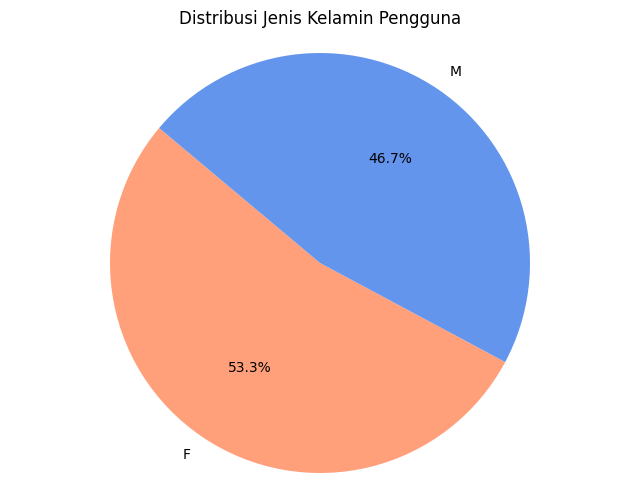

In [54]:
# Menghitung jumlah pengguna berdasarkan jenis kelamin
gender_counts = data_cleaned['payCardSex'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightsalmon', 'cornflowerblue'])
plt.title('Distribusi Jenis Kelamin Pengguna')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Hasil
Pie chart di atas menunjukkan distribusi pengguna berdasarkan jenis kelamin. Dari visualisasi tersebut, kita dapat melihat bahwa:

1. Pengguna perempuan (F) mendominasi dengan persentase sebesar 53.3%.
2. Pengguna laki-laki (M) berjumlah 46.7%.

# Analisis

1. Kesetaraan Gender:

Perbandingan jenis kelamin pengguna yang cukup seimbang menunjukkan bahwa layanan yang disediakan digunakan oleh kedua jenis kelamin. Hal ini bisa menunjukkan bahwa tidak ada bias gender yang signifikan dalam penggunaan layanan ini.

2. Strategi Pemasaran:

Dengan mengetahui bahwa lebih dari setengah pengguna adalah perempuan, perusahaan dapat mempertimbangkan untuk merancang strategi pemasaran yang lebih fokus pada perempuan, sambil tetap mempertahankan daya tarik untuk pengguna laki-laki.

3. Pengembangan Produk:

- Penyesuaian Fitur:

Jika mayoritas pengguna adalah perempuan, perusahaan dapat mempertimbangkan untuk mengembangkan fitur-fitur yang lebih sesuai dengan preferensi dan kebutuhan perempuan. Misalnya, jika layanan ini adalah layanan keuangan atau pembayaran, mungkin fitur-fitur seperti pengelolaan anggaran rumah tangga, diskon atau promosi pada produk-produk yang sering dibeli oleh perempuan, atau dukungan untuk usaha kecil yang sering dijalankan oleh perempuan dapat diperkenalkan atau ditingkatkan.

- Personalisasi Layanan:

Menyediakan opsi personalisasi layanan yang dapat dipilih oleh pengguna berdasarkan preferensi gender. Misalnya, memberikan rekomendasi produk atau layanan yang lebih relevan dengan pola penggunaan pengguna perempuan.

- Konten yang Relevan:

Mengembangkan konten pemasaran atau edukasi yang lebih relevan bagi perempuan, seperti tips keuangan untuk ibu rumah tangga, program loyalitas yang menarik bagi perempuan, dan lain-lain.

4. Keputusan Bisnis :
Dengan memahami distribusi gender pengguna, stakeholder dapat membuat keputusan bisnis yang lebih terinformasi dalam beberapa aspek berikut:

- Segmentasi Pasar:

Mengetahui bahwa pengguna perempuan mendominasi, perusahaan dapat mengalokasikan lebih banyak sumber daya untuk menjangkau dan melibatkan segmen pasar ini. Ini dapat mencakup kampanye pemasaran yang ditargetkan, event atau promosi khusus untuk perempuan, dan lain-lain.

- Alokasi Anggaran Pemasaran:

Alokasi anggaran pemasaran dapat lebih difokuskan pada kanal-kanal yang lebih sering digunakan oleh perempuan, seperti media sosial tertentu, komunitas online, atau influencer yang memiliki pengaruh besar di kalangan perempuan.

- Pengembangan Produk:

Keputusan untuk mengembangkan atau memperbaiki produk dapat didasarkan pada preferensi pengguna perempuan. Misalnya, jika data menunjukkan bahwa pengguna perempuan lebih sering menggunakan fitur tertentu, perusahaan dapat memprioritaskan pengembangan atau peningkatan fitur tersebut.

-Pengembangan Kampanye:

Kampanye pemasaran dapat dirancang dengan pesan yang lebih relevan untuk pengguna perempuan, menggunakan bahasa dan visual yang lebih menarik bagi mereka.

- Diversifikasi Layanan:

Meskipun fokus dapat diberikan pada pengguna perempuan, perusahaan juga perlu memastikan bahwa layanan tetap menarik bagi pengguna laki-laki. Ini bisa berarti menjaga keseimbangan dalam fitur yang ditawarkan dan memastikan bahwa layanan tidak terlihat bias terhadap salah satu gender.

**Contoh Implementasi**

1. Fitur Spesifik:

Perusahaan e-commerce mungkin menyediakan kategori produk khusus untuk perempuan dengan penawaran diskon khusus, atau layanan keuangan dapat menyediakan program edukasi keuangan untuk ibu rumah tangga.

2. Konten Marketing:

Membuat artikel atau video tentang manajemen keuangan keluarga yang mungkin lebih relevan dan menarik bagi perempuan.

3. Promosi dan Event:

Mengadakan event atau promo khusus pada hari-hari tertentu seperti Hari Kartini atau Hari Ibu yang mungkin lebih menarik bagi perempuan.

# **Distribusi Usia Pengguna**

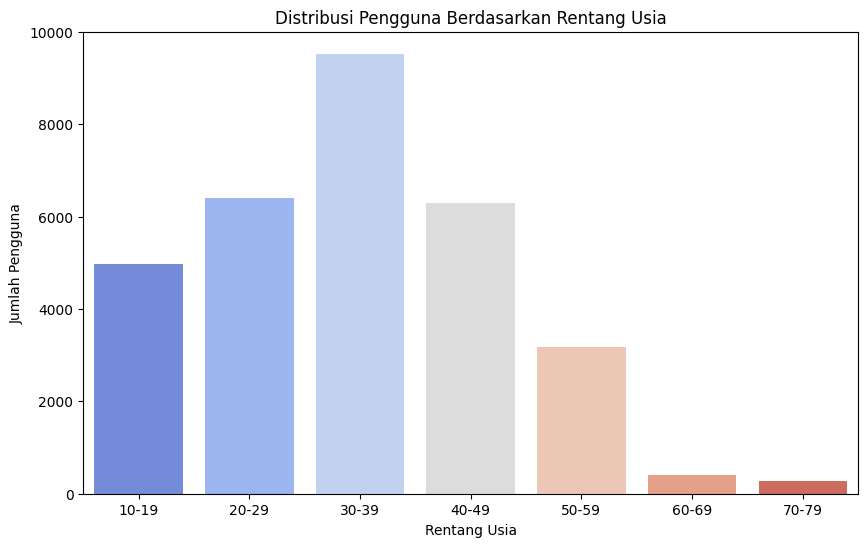

In [34]:
# Mengelompokkan usia ke dalam rentang
age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data_cleaned['age_group'] = pd.cut(data_cleaned['age'], bins=age_bins, labels=age_labels, right=False)

# Menghitung jumlah pengguna dalam setiap rentang usia
age_group_counts = data_cleaned['age_group'].value_counts().sort_index()

# Membuat bar plot 
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='coolwarm')
plt.title('Distribusi Pengguna Berdasarkan Rentang Usia')
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah Pengguna')
plt.show()

# Analisis Distribusi Pengguna Berdasarkan Rentang Usia

1. Kelompok Usia Terbesar:

Rentang usia 30-39 memiliki jumlah pengguna terbanyak, yaitu sekitar 8000 pengguna.
Ini menunjukkan bahwa layanan ini paling populer di kalangan orang dewasa muda hingga setengah baya.

2. Kelompok Usia Menengah:

Rentang usia 20-29 dan 40-49 juga memiliki jumlah pengguna yang signifikan, masing-masing sekitar 7000 dan 6000 pengguna.
Ini menunjukkan bahwa layanan ini juga menarik bagi orang dewasa muda dan dewasa pertengahan.

3. Kelompok Usia Lebih Muda:

Rentang usia 10-19 memiliki sekitar 6000 pengguna.
Menunjukkan bahwa layanan ini juga digunakan oleh remaja, meskipun tidak sebanyak kelompok usia dewasa muda.

4. Kelompok Usia Lebih Tua:

Rentang usia 50-59 memiliki sekitar 4000 pengguna.
Rentang usia 60-69 dan 70-79 memiliki pengguna yang lebih sedikit, masing-masing sekitar 1000 pengguna.
Menunjukkan bahwa layanan ini kurang populer di kalangan orang yang lebih tua.

# Implikasi untuk Bisnis

1. Target Pasar Utama:

Perusahaan dapat memfokuskan upaya pemasaran dan pengembangan produk pada kelompok usia 30-39 karena mereka merupakan pengguna terbesar.
Kampanye pemasaran yang disesuaikan dengan kebutuhan dan preferensi kelompok usia ini kemungkinan besar akan memberikan hasil yang baik.

2. Pengembangan Fitur:

Mengembangkan fitur yang sesuai dengan kehidupan profesional dan personal kelompok usia 30-39 dan 20-29, seperti fitur manajemen keuangan, investasi, atau penawaran khusus untuk keluarga muda.
Untuk kelompok usia 40-49, mungkin fitur yang terkait dengan perencanaan pensiun atau pendidikan anak bisa lebih relevan.

3. Segmentasi Pemasaran:

Membuat segmentasi yang lebih spesifik berdasarkan rentang usia untuk kampanye pemasaran.
Menggunakan kanal pemasaran yang populer di kalangan setiap rentang usia, seperti media sosial untuk kelompok usia lebih muda dan email marketing atau iklan televisi untuk kelompok usia lebih tua.

4. Personalisasi Layanan:

Menawarkan personalisasi layanan berdasarkan usia pengguna untuk meningkatkan kepuasan dan retensi pelanggan.
Misalnya, penawaran produk atau layanan yang relevan dengan kebutuhan kelompok usia tertentu, seperti promosi khusus untuk ulang tahun atau milestone tertentu dalam kehidupan.

# Kesimpulan :
Grafik ini memberikan wawasan yang berharga tentang demografi pengguna layanan berdasarkan usia. Dengan memahami distribusi usia pengguna, perusahaan dapat membuat keputusan yang lebih tepat dalam pengembangan produk, pemasaran, dan personalisasi layanan, sehingga dapat meningkatkan kepuasan pelanggan dan keuntungan bisnis secara keseluruhan.

# **Distribusi Bank Penerbit Kartu**

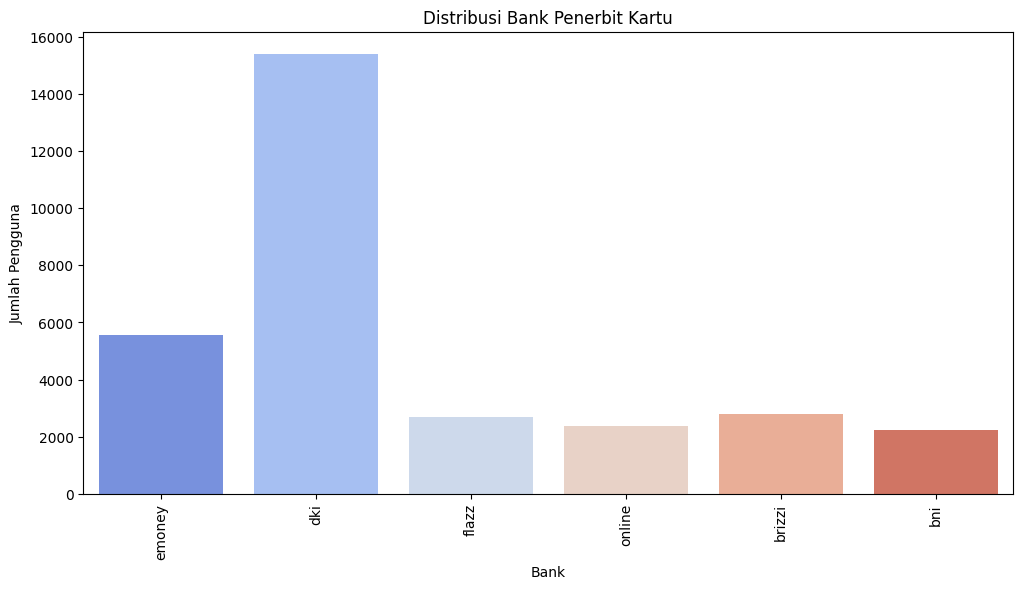

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='payCardBank', palette='coolwarm')
plt.title('Distribusi Bank Penerbit Kartu')
plt.xlabel('Bank')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=90)
plt.show()

# Analisis Distribusi Pengguna Berdasarkan Bank Penerbit Kartu

1. Bank Penerbit dengan Pengguna Terbanyak:

- Bank DKI memiliki jumlah pengguna terbanyak, yaitu sekitar 16000 pengguna.
Ini menunjukkan bahwa kartu yang diterbitkan oleh Bank DKI sangat populer di kalangan pengguna.

2. Bank Penerbit Lainnya:

- E-money (dari Bank Mandiri) adalah penerbit kartu dengan jumlah pengguna terbanyak kedua, yaitu sekitar 6000 pengguna.
- Flazz ( dari BCA), Online (bisa jadi dari berbagai bank), Brizzi (dari BRI), dan BNI masing-masing memiliki jumlah pengguna yang lebih rendah, berkisar antara 2000 hingga 3000 pengguna.
Ini menunjukkan bahwa meskipun kartu dari bank-bank ini digunakan, popularitasnya tidak sebesar kartu dari Bank DKI.

# Implikasi untuk Bisnis

1. Kemitraan dengan Bank DKI:

Perusahaan dapat mempertimbangkan untuk menjalin kemitraan strategis dengan Bank DKI untuk promosi bersama atau penawaran khusus bagi pengguna kartu Bank DKI.
Program loyalitas atau diskon eksklusif untuk pengguna kartu Bank DKI bisa menjadi strategi yang efektif untuk menarik dan mempertahankan pelanggan.

2. Promosi kepada Pengguna E-money:

Meskipun tidak sebesar Bank DKI, pengguna E-money juga cukup banyak. Perusahaan bisa menawarkan promo khusus untuk pengguna E-money untuk meningkatkan penggunaan dan loyalitas mereka.

3. Pengembangan Produk:

- Pemahaman Lebih Lanjut:

Analisis lebih mendalam diperlukan untuk memahami mengapa kartu dari Bank DKI dan E-money lebih populer dibandingkan dengan bank lain. Ini bisa mencakup survei pengguna untuk mendapatkan wawasan tentang fitur dan layanan yang diinginkan atau mungkin ada aspek kepercayaan dan reputasi yang lebih tinggi untuk bank-bank ini.
Bank DKI, misalnya, bekerja sama erat dengan PT Transjakarta dalam penyediaan layanan pembayaran untuk transportasi umum, yang berkontribusi pada popularitasnya. Bank DKI mendukung program transportasi ramah lingkungan di Jakarta, yang juga bisa menjadi faktor peningkat popularitas kartu mereka.

- Pengembangan Fitur Tambahan:

Fitur tambahan bisa dikembangkan untuk menarik pengguna dari bank lain, seperti program loyalitas khusus, diskon eksklusif untuk pengguna kartu tersebut, atau integrasi pembayaran yang lebih mulus dan aman.
Bank DKI bisa mempertimbangkan untuk memperluas layanan dan fitur mereka yang mendukung transportasi umum dan ramah lingkungan. Misalnya, program penawaran khusus untuk pengguna transportasi umum atau insentif untuk penggunaan kendaraan listrik.

4. Segmentasi Pemasaran:

- Kampanye Pemasaran yang Ditargetkan:

Berdasarkan data distribusi, kampanye pemasaran dapat difokuskan pada pengguna kartu Bank DKI dan E-money dengan menonjolkan fitur-fitur unggulan dan keuntungannya. Ini bisa mencakup promosi di platform yang sering digunakan oleh pengguna transportasi umum.
Kampanye terpisah bisa dirancang untuk bank lain dengan menekankan fitur-fitur yang mungkin belum mereka manfaatkan, atau kolaborasi dengan merchant-merchant untuk memberikan penawaran eksklusif bagi pengguna kartu dari bank tersebut.

- Segmentasi Pasar:

Dengan data ini, perusahaan dapat melakukan segmentasi pasar yang lebih tepat. Misalnya, pengguna kartu Bank DKI bisa diklasifikasikan sebagai pengguna yang sering menggunakan transportasi umum, sehingga kampanye terkait bisa fokus pada kenyamanan dan kemudahan dalam penggunaan kartu untuk transportasi.
Sementara itu, kampanye untuk pengguna kartu dari bank lain bisa difokuskan pada peningkatan kesadaran fitur-fitur dan keuntungan penggunaan kartu tersebut di berbagai sektor lain selain transportasi.

# Informasi tambahan :
Bank DKI telah mengambil langkah-langkah proaktif dalam mendukung transportasi ramah lingkungan di Jakarta, termasuk pembiayaan bus listrik dan kerjasama dengan PT Transjakarta. Ini menunjukkan bahwa Bank DKI memiliki komitmen kuat dalam mendukung inisiatif pemerintah daerah dan menyediakan layanan yang relevan dengan kebutuhan masyarakat Jakarta.

Kolaborasi ini bisa dijadikan analisis bahwa popularitas kartu Bank DKI sangat dipengaruhi oleh keterlibatan mereka dalam proyek-proyek infrastruktur penting di Jakarta. Hal ini juga menunjukkan bahwa kolaborasi dengan institusi pemerintah dan proyek-proyek besar bisa meningkatkan adopsi dan penggunaan produk perbankan tertentu.

# Kesimpulan
Bank DKI dan E-money memiliki distribusi pengguna yang lebih tinggi karena kerjasama strategis dengan PT Transjakarta dan fokus pada transportasi ramah lingkungan.
Pengembangan fitur dan layanan yang mendukung inisiatif transportasi dan ramah lingkungan bisa menjadi strategi yang efektif untuk meningkatkan adopsi kartu dari bank lain.
Kampanye pemasaran yang ditargetkan dan segmentasi pasar berdasarkan data distribusi pengguna bisa membantu dalam alokasi sumber daya yang lebih efektif dan peningkatan penggunaan kartu.
Dengan informasi ini, perusahaan dapat membuat strategi yang lebih informatif dan data-driven untuk meningkatkan penggunaan kartu serta mendukung inisiatif ramah lingkungan di Jakarta.


# **Rata-rata Durasi Perjalanan Berdasarkan Waktu Perjalanan**

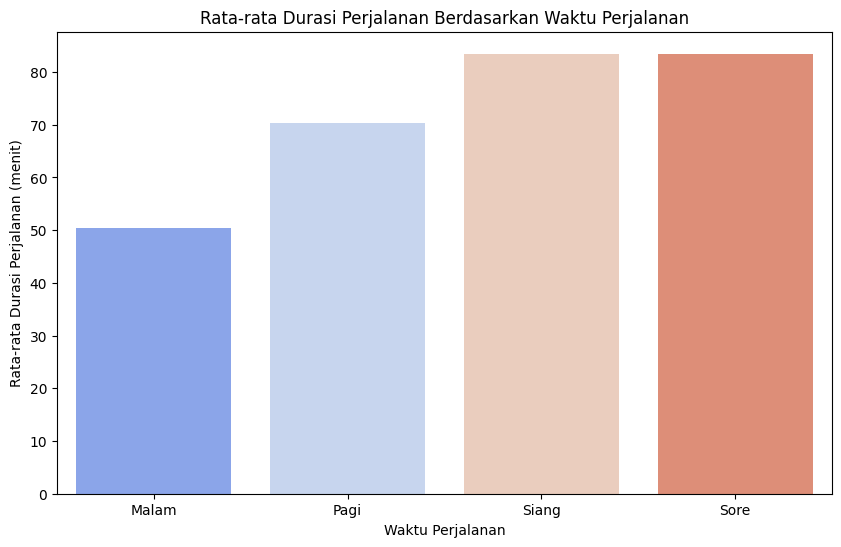

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_cleaned, x='time_period', y='trip_duration', ci=None, palette='coolwarm')
plt.title('Rata-rata Durasi Perjalanan Berdasarkan Waktu Perjalanan')
plt.xlabel('Waktu Perjalanan')
plt.ylabel('Rata-rata Durasi Perjalanan (menit)')
plt.show()

# Analisis Rata-rata Durasi Perjalanan Berdasarkan Waktu Perjalanan
Grafik ini menunjukkan rata-rata durasi perjalanan di berbagai koridor Transjakarta berdasarkan waktu perjalanan, yaitu malam, pagi, siang, dan sore.

# Analisis

1. Durasi Perjalanan di Malam Hari:

Rata-rata durasi perjalanan di malam hari adalah yang terpendek dibandingkan dengan waktu-waktu lainnya. Hal ini kemungkinan besar disebabkan oleh lalu lintas yang lebih lancar di malam hari karena volume kendaraan yang lebih sedikit.

2. Durasi Perjalanan di Pagi Hari:

Rata-rata durasi perjalanan di pagi hari lebih lama dibandingkan malam hari. Ini bisa disebabkan oleh jam sibuk pagi di mana banyak orang berangkat kerja atau sekolah, sehingga lalu lintas menjadi lebih padat.

3. Durasi Perjalanan di Siang Hari:

Rata-rata durasi perjalanan di siang hari adalah yang tertinggi, hampir sama dengan sore hari. Ini mungkin karena volume kendaraan yang tinggi saat orang beraktivitas dan juga bisa jadi dipengaruhi oleh faktor cuaca seperti panas terik yang bisa mempengaruhi kecepatan perjalanan.

4. Durasi Perjalanan di Sore Hari:

Rata-rata durasi perjalanan di sore hari juga tinggi, hampir sama dengan siang hari. Hal ini disebabkan oleh jam pulang kerja di mana banyak orang kembali ke rumah, menyebabkan kepadatan lalu lintas yang signifikan.

# Insight :

- Optimalisasi Rute dan Jadwal: 
Berdasarkan analisis ini, Transjakarta dapat mempertimbangkan untuk mengoptimalkan rute dan jadwal layanan mereka di waktu-waktu tertentu, seperti meningkatkan frekuensi bus di pagi, siang, dan sore hari untuk mengakomodasi volume penumpang yang tinggi dan mengurangi durasi perjalanan.

- Manajemen Lalu Lintas: 
Pemerintah daerah dan pengelola transportasi umum bisa menggunakan data ini untuk mengembangkan strategi manajemen lalu lintas yang lebih baik selama jam-jam sibuk, seperti pemberlakuan jalur khusus untuk bus Transjakarta yang lebih ketat untuk memastikan perjalanan lebih lancar dan cepat.

- Informasi kepada Penumpang: 
Informasi tentang durasi perjalanan rata-rata di waktu-waktu tertentu bisa disampaikan kepada penumpang untuk membantu mereka merencanakan perjalanan dengan lebih baik dan mungkin memilih waktu perjalanan yang lebih tidak padat.

# Keputusan Bisnis

- Pengembangan Layanan: 
Untuk meningkatkan pengalaman pengguna, Transjakarta bisa mempertimbangkan untuk menambahkan lebih banyak armada selama jam-jam sibuk atau mengembangkan rute alternatif yang bisa membantu mengurangi kepadatan.

- Promosi Waktu Perjalanan: 
Promosi atau insentif untuk penumpang yang melakukan perjalanan di waktu yang lebih tidak sibuk, seperti malam hari, bisa dilakukan untuk mengurangi beban pada waktu-waktu sibuk.

# **Rata-rata Durasi Perjalanan Berdasarkan Koridor**

Rata-rata Durasi Perjalanan Berdasarkan Koridor (5 Terpendek & 5 Terpanjang)

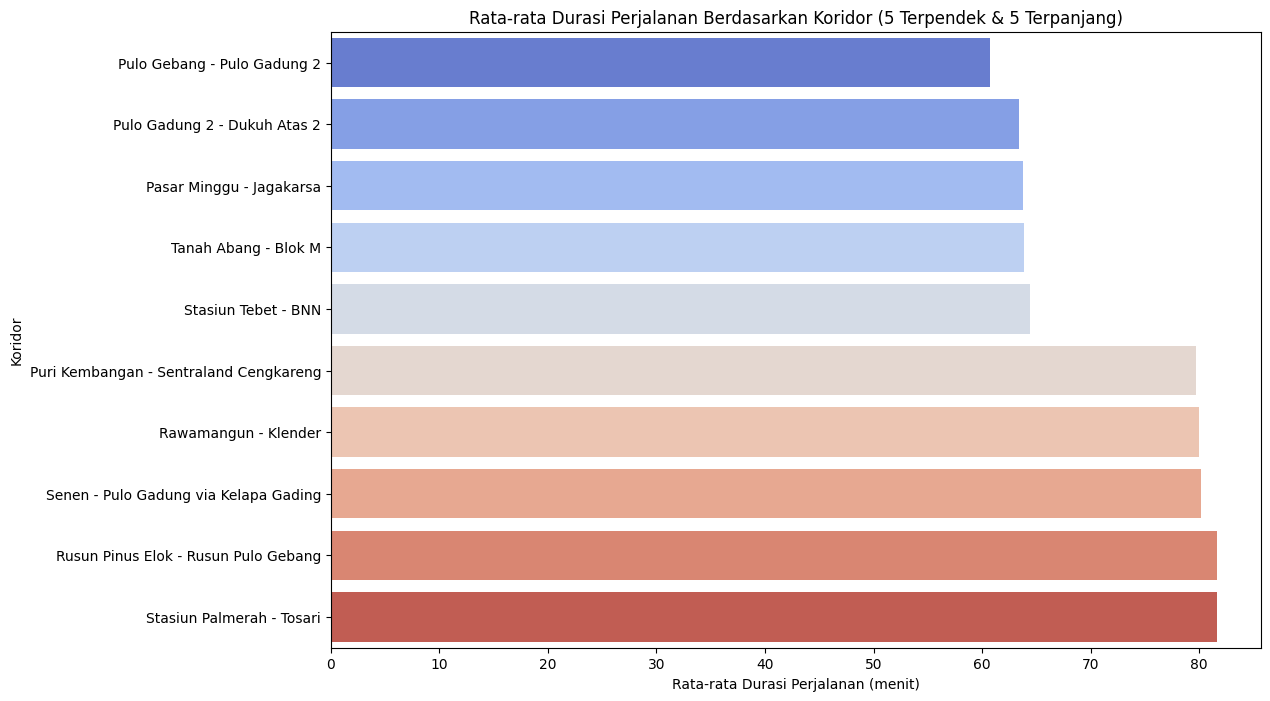

In [47]:
# Membuat DataFrame untuk visualisasi
average_durations = {koridor: data.mean() for koridor, data in cleaned_data.items()}
average_durations_df = pd.DataFrame.from_dict(average_durations, orient='index', columns=['Average Duration'])
average_durations_df.reset_index(inplace=True)
average_durations_df.rename(columns={'index': 'Corridor'}, inplace=True)

# Sortir koridor berdasarkan rata-rata durasi perjalanan
sorted_durations_df = average_durations_df.sort_values(by='Average Duration')

# Pilih 5 koridor teratas dan 5 koridor terbawah
top_5_shortest = sorted_durations_df.head(5)
top_5_longest = sorted_durations_df.tail(5)

# Gabungkan dua subset ini
combined_df = pd.concat([top_5_shortest, top_5_longest])

# Visualisasi hasil dengan bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Duration', y='Corridor', data=combined_df, palette='coolwarm')
plt.title('Rata-rata Durasi Perjalanan Berdasarkan Koridor (5 Terpendek & 5 Terpanjang)')
plt.xlabel('Rata-rata Durasi Perjalanan (menit)')
plt.ylabel('Koridor')
plt.show()

### Analisis Grafik Rata-rata Durasi Perjalanan Berdasarkan Koridor (5 Terpendek & 5 Terpanjang)

Grafik di atas menunjukkan rata-rata durasi perjalanan untuk 5 koridor dengan durasi terpendek dan 5 koridor dengan durasi terpanjang. Berdasarkan hasil uji ANOVA, terdapat perbedaan signifikan dalam rata-rata durasi perjalanan antara koridor-koridor tersebut.

**Temuan Utama:**
1. **Koridor dengan Durasi Terpendek:** 
   - Pulo Gebang - Pulo Gadung 2
   - Pulo Gadung 2 - Dukuh Atas 2
   - Pasar Minggu - Jagakarsa
   - Tanah Abang - Blok M
   - Stasiun Tebet - BNN

2. **Koridor dengan Durasi Terpanjang:**
   - Puri Kembangan - Sentraland Cengkareng
   - Rawamangun - Klender
   - Senen - Pulo Gadung via Kelapa Gading
   - Rusun Pinus Elok - Rusun Pulo Gebang
   - Stasiun Palmerah - Tosari

**Implikasi Bisnis:**

1. **Optimalisasi Operasional:**
   - **Peninjauan Lebih Lanjut:** Koridor dengan durasi perjalanan terpanjang perlu ditinjau lebih lanjut untuk mengidentifikasi faktor-faktor yang menyebabkan waktu tempuh yang lama. Hal ini dapat mencakup analisis terhadap kondisi lalu lintas, frekuensi bus, dan efisiensi rute.
   - **Solusi Efisiensi:** Berdasarkan temuan dari peninjauan tersebut, langkah-langkah spesifik dapat diambil untuk mengoptimalkan efisiensi perjalanan. Misalnya, menambah frekuensi bus pada jam sibuk, mengubah rute untuk menghindari kemacetan, atau meningkatkan koordinasi dengan pihak terkait untuk mempercepat perjalanan.

2. **Pengembangan Infrastruktur:**
   - **Identifikasi Kendala:** Jika ditemukan kendala infrastruktur seperti jalan yang sempit, kondisi jalan yang buruk, atau kurangnya fasilitas penunjang di sepanjang koridor dengan durasi perjalanan terpanjang, langkah-langkah perbaikan perlu direncanakan.
   - **Implementasi Perbaikan:** Mengalokasikan dana dan sumber daya untuk memperbaiki infrastruktur di koridor-koridor yang bermasalah. Misalnya, memperlebar jalan, memperbaiki kondisi jalan, atau menambahkan halte bus yang lebih baik.

3. **Perencanaan Jadwal:**
   - **Optimasi Jadwal:** Data ini dapat digunakan untuk mengoptimalkan perencanaan jadwal bus, khususnya pada koridor dengan durasi perjalanan yang lebih lama. Dengan penyesuaian jadwal yang tepat, waktu tunggu penumpang dapat dikurangi dan efisiensi operasional dapat ditingkatkan.
   - **Alokasi Sumber Daya:** Berdasarkan analisis durasi perjalanan, alokasi sumber daya seperti jumlah bus dan pengaturan shift pengemudi dapat diatur lebih baik untuk mengurangi beban pada koridor yang memiliki durasi perjalanan yang lebih lama.

# **Rata-rata Pembayaran Berdasarkan Jenis Kelamin**

  payCardSex  average_payment
0          F      1837.306573
1          M      1903.741278


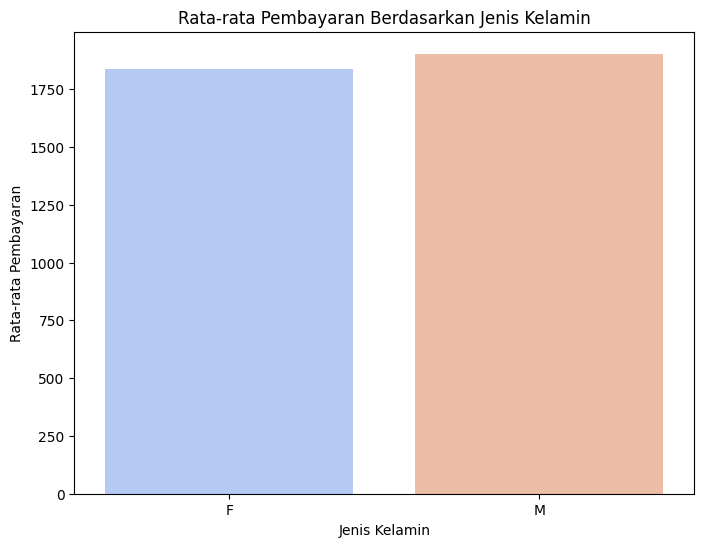

In [44]:
# Rata-rata pembayaran berdasarkan jenis kelamin
average_payment_sex = data_cleaned.groupby('payCardSex')['payAmount'].mean().reset_index(name='average_payment')
print(average_payment_sex)

# Visualisasi Rata-rata Pembayaran Berdasarkan Jenis Kelamin
plt.figure(figsize=(8, 6))
sns.barplot(x='payCardSex', y='average_payment', data=average_payment_sex, palette='coolwarm')
plt.title('Rata-rata Pembayaran Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-rata Pembayaran')
plt.show()

### Analisis Grafik Rata-rata Pembayaran Berdasarkan Jenis Kelamin

Grafik di atas menunjukkan rata-rata jumlah pembayaran yang dilakukan oleh pengguna berdasarkan jenis kelamin mereka. Pada grafik ini, warna biru mewakili pengguna perempuan (F) dan warna hijau mewakili pengguna laki-laki (M).

**Hasil Utama:**
- Rata-rata pembayaran yang dilakukan oleh pengguna perempuan adalah sekitar 1837.31.
- Rata-rata pembayaran yang dilakukan oleh pengguna laki-laki adalah sekitar 1903.74.

### Implikasi Bisnis

#### Strategi Pemasaran

1. **Penawaran Khusus:**
   - **Diskon atau Cashback untuk Perempuan:** Mengingat rata-rata pembayaran pengguna perempuan sedikit lebih rendah, perusahaan dapat merancang program diskon atau cashback untuk jenis pembayaran tertentu yang sering dilakukan oleh perempuan. Contohnya, diskon khusus untuk pembelian produk fashion atau kecantikan, yang mungkin lebih sering dibeli oleh perempuan.
   - **Paket Bundling untuk Laki-laki:** Pengguna laki-laki cenderung memiliki rata-rata pembayaran yang lebih tinggi. Oleh karena itu, perusahaan bisa menawarkan paket bundling yang menarik untuk layanan atau produk yang lebih sering digunakan oleh laki-laki, seperti elektronik atau produk teknologi.
   - **Promosi Hari Perempuan:** Mengadakan promosi khusus pada hari-hari tertentu yang mungkin lebih menarik bagi perempuan, seperti Hari Perempuan Internasional, dengan penawaran spesial yang eksklusif untuk pengguna perempuan.

2. **Kampanye Pemasaran yang Ditargetkan:**
   - **Iklan Berbasis Gender:** Menggunakan data ini untuk mengembangkan kampanye iklan yang disesuaikan dengan preferensi dan kebiasaan belanja masing-masing kelompok. Misalnya, iklan di media sosial yang menargetkan perempuan dengan konten yang relevan dengan minat mereka, dan sebaliknya untuk laki-laki.
   - **Personalized Marketing:** Memanfaatkan analitik untuk mengirimkan penawaran yang dipersonalisasi melalui email atau aplikasi, berdasarkan riwayat pembayaran dan preferensi pengguna. Ini akan meningkatkan relevansi penawaran dan kemungkinan pengguna akan merespons dengan positif.
   - **Program Loyalitas Khusus:** Membuat program loyalitas yang dirancang khusus untuk laki-laki dan perempuan, dengan hadiah atau insentif yang berbeda sesuai dengan pola pembayaran mereka. Misalnya, program loyalitas yang memberikan poin tambahan untuk kategori produk yang lebih sering dibeli oleh perempuan.

#### Pengembangan Produk

1. **Kebutuhan Spesifik:**
   - **Fitur Khusus untuk Laki-laki:** Jika analisis lebih lanjut menunjukkan bahwa laki-laki lebih sering melakukan pembayaran untuk layanan tertentu, perusahaan bisa mengembangkan lebih banyak fitur yang menarik bagi mereka. Misalnya, fitur tambahan untuk transaksi elektronik atau produk teknologi yang sering dibeli oleh laki-laki.
   - **Produk yang Lebih Menarik untuk Perempuan:** Untuk pengguna perempuan, perusahaan bisa mengeksplorasi produk atau layanan yang lebih relevan dengan kebutuhan mereka. Misalnya, layanan berlangganan untuk produk kecantikan atau mode yang sering diminati oleh perempuan.

2. **Kenyamanan Pembayaran:**
   - **Metode Pembayaran yang Lebih Mudah:** Untuk meningkatkan rata-rata pembayaran pengguna perempuan, perusahaan bisa mengeksplorasi cara untuk membuat proses pembayaran lebih mudah dan nyaman. Misalnya, menambahkan opsi pembayaran yang lebih beragam atau integrasi dengan aplikasi pembayaran yang sering digunakan oleh perempuan.
   - **Insentif Pembayaran:** Memberikan insentif tambahan seperti poin reward atau diskon untuk setiap transaksi yang dilakukan oleh pengguna perempuan bisa meningkatkan jumlah pembayaran mereka. Ini juga bisa mendorong mereka untuk melakukan transaksi lebih sering.


# **Rata-rata Pembayaran Berdasarkan Bank Penerbit Kartu**

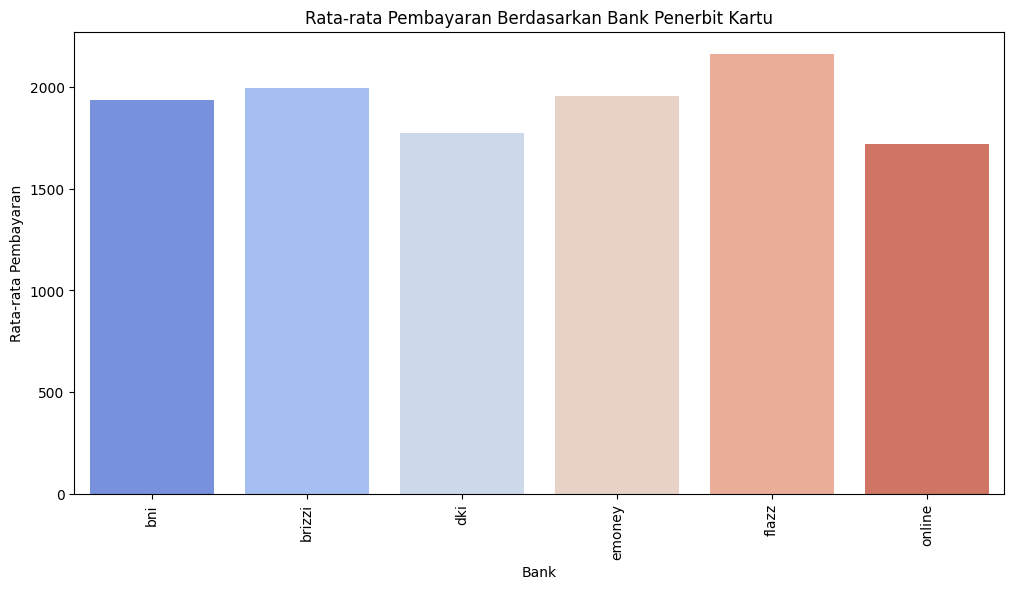

In [45]:
average_payment_bank = data_cleaned.groupby('payCardBank')['payAmount'].mean().reset_index(name='average_payment')

plt.figure(figsize=(12, 6))
sns.barplot(x='payCardBank', y='average_payment', data=average_payment_bank, palette='coolwarm')
plt.title('Rata-rata Pembayaran Berdasarkan Bank Penerbit Kartu')
plt.xlabel('Bank')
plt.ylabel('Rata-rata Pembayaran')
plt.xticks(rotation=90)
plt.show()

### Analisis Grafik Rata-rata Pembayaran Berdasarkan Bank Penerbit Kartu

Grafik di atas menunjukkan rata-rata jumlah pembayaran yang dilakukan oleh pengguna berdasarkan bank penerbit kartu mereka. Bank-bank yang ditampilkan termasuk BNI, BRIZZI, DKI, Emoney, Flazz, dan Online.

**Hasil Utama:**
- Rata-rata pembayaran tertinggi dilakukan oleh pengguna kartu Flazz, diikuti oleh pengguna kartu BRIZZI.
- Pengguna kartu DKI dan Emoney memiliki rata-rata pembayaran yang hampir sama.
- Pengguna kartu Online memiliki rata-rata pembayaran terendah di antara semua bank yang ditampilkan.

### Implikasi Bisnis

#### Strategi Pemasaran

1. **Penawaran Khusus:**
   - **Diskon atau Cashback untuk Pengguna Kartu Flazz dan BRIZZI:** Mengingat rata-rata pembayaran tertinggi berasal dari pengguna kartu Flazz dan BRIZZI, perusahaan dapat merancang program diskon atau cashback khusus untuk transaksi yang dilakukan dengan kartu-kartu ini. Hal ini dapat mendorong pengguna untuk melakukan lebih banyak transaksi dengan kartu tersebut.
   - **Promosi untuk Pengguna Kartu dengan Pembayaran Rendah:** Untuk meningkatkan jumlah pembayaran pengguna kartu Online, perusahaan bisa memberikan insentif tambahan seperti diskon atau hadiah untuk meningkatkan penggunaan kartu ini.

2. **Kampanye Pemasaran yang Ditargetkan:**
   - **Iklan Berbasis Bank Penerbit:** Menggunakan data ini untuk mengembangkan kampanye iklan yang disesuaikan dengan preferensi pengguna berdasarkan bank penerbit kartu. Misalnya, iklan yang menargetkan pengguna kartu Flazz dengan penawaran khusus untuk produk atau layanan yang sering mereka beli.
   - **Segmentasi Pasar:** Mengidentifikasi segmen pasar yang menggunakan kartu-kartu dengan pembayaran tinggi dan mengarahkan kampanye pemasaran yang lebih intensif kepada mereka untuk meningkatkan loyalitas dan frekuensi penggunaan kartu.

#### Pengembangan Produk

1. **Fitur Khusus untuk Kartu dengan Pembayaran Tinggi:**
   - **Pengembangan Layanan:** Jika analisis lebih lanjut menunjukkan bahwa pengguna kartu Flazz dan BRIZZI lebih sering melakukan pembayaran untuk layanan tertentu, perusahaan bisa mengembangkan lebih banyak fitur atau layanan yang menarik bagi mereka. Misalnya, fitur tambahan untuk transaksi di merchant favorit pengguna kartu-kartu tersebut.
   - **Integrasi dengan Merchant Populer:** Memastikan kartu-kartu dengan rata-rata pembayaran tinggi memiliki integrasi yang lancar dengan merchant populer yang sering digunakan oleh pengguna kartu tersebut.

2. **Kenyamanan Pembayaran:**
   - **Peningkatan Metode Pembayaran untuk Kartu dengan Pembayaran Rendah:** Untuk meningkatkan rata-rata pembayaran pengguna kartu Online, perusahaan bisa mengeksplorasi cara untuk membuat proses pembayaran lebih mudah dan nyaman. Misalnya, menambahkan opsi pembayaran yang lebih beragam atau meningkatkan teknologi keamanan untuk pengguna kartu Online.
   - **Insentif Pembayaran:** Memberikan insentif tambahan seperti poin reward atau diskon untuk setiap transaksi yang dilakukan oleh pengguna kartu Online bisa meningkatkan jumlah pembayaran mereka. Ini juga bisa mendorong mereka untuk melakukan transaksi lebih sering.


# **Rata-rata Jumlah Pembayaran Berdasarkan Kelompok Usia**

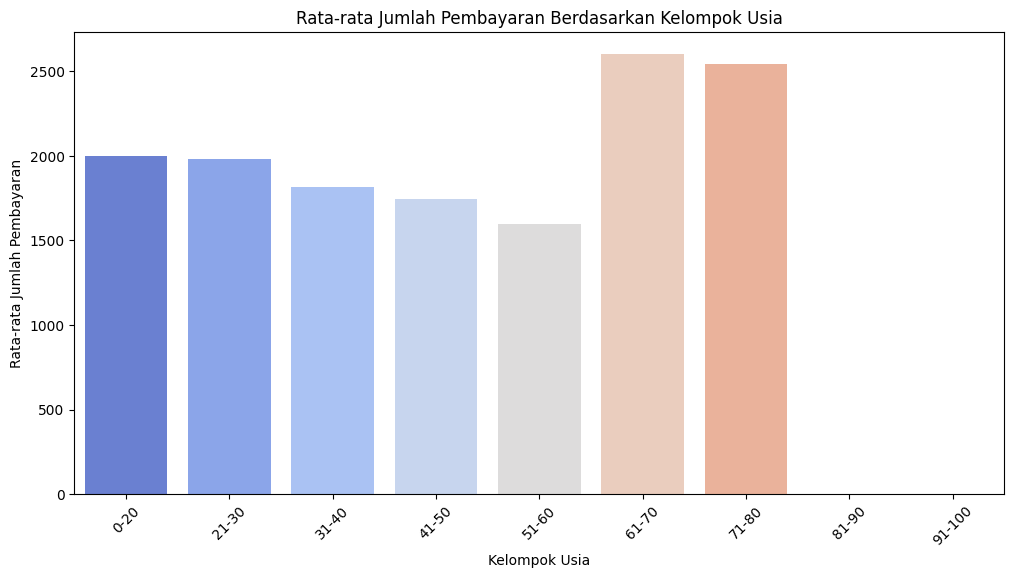

In [46]:
# Binning the age to create groups
data_cleaned['age_group'] = pd.cut(data_cleaned['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                                   labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Calculate mean payAmount for each age group
age_group_payment = data_cleaned.groupby('age_group')['payAmount'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='payAmount', data=age_group_payment, palette='coolwarm')
plt.title('Rata-rata Jumlah Pembayaran Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Rata-rata Jumlah Pembayaran')
plt.xticks(rotation=45)
plt.show()

# Deskripsi Grafik:
Grafik di atas menampilkan rata-rata jumlah pembayaran (payAmount) berdasarkan kelompok usia pengguna. Kelompok usia dikelompokkan dalam interval 10 tahun mulai dari 0-20 hingga 91-100.

# Hasil Analisa:

1. Kelompok Usia 0-20 dan 21-30:

Rata-rata jumlah pembayaran untuk kelompok usia ini berada di sekitar 2000.
Ini menunjukkan bahwa pengguna dalam rentang usia ini cenderung memiliki pembayaran rata-rata yang cukup tinggi.

2. Kelompok Usia 31-40, 41-50, dan 51-60:

Rata-rata jumlah pembayaran untuk kelompok usia ini berada di bawah 2000.
Ini menunjukkan penurunan dalam rata-rata jumlah pembayaran dibandingkan dengan kelompok usia sebelumnya (0-30).

3. Kelompok Usia 61-70 dan 71-80:

Rata-rata jumlah pembayaran untuk kelompok usia 61-70 meningkat tajam dan mencapai sekitar 2600.
Kelompok usia 71-80 juga menunjukkan rata-rata jumlah pembayaran yang tinggi, tetapi sedikit lebih rendah dibandingkan kelompok usia 61-70.

4. Kelompok Usia 81-90 dan 91-100:

Data untuk kelompok usia ini tidak ada atau tidak ditampilkan dalam grafik. Mungkin disebabkan oleh kurangnya sampel data untuk rentang usia ini.


# Interpretasi:

## 1. Kelompok Usia Muda (0-30):
Pengguna dalam kelompok usia muda cenderung memiliki pembayaran rata-rata yang tinggi. Hal ini mungkin disebabkan oleh tingginya aktivitas atau kebutuhan transportasi pada kelompok usia ini.

### Kebutuhan dan Preferensi:
- Pengguna dalam kelompok usia ini mungkin merupakan pelajar, mahasiswa, atau pekerja muda yang memiliki mobilitas tinggi.
- Mereka cenderung lebih responsif terhadap penawaran diskon, promosi harian, atau program loyalitas berbasis aplikasi.

### Strategi:
- **Diskon dan Promosi:** Perusahaan dapat menawarkan diskon khusus pada jam sibuk pagi dan sore hari ketika banyak pengguna muda yang berangkat atau pulang dari tempat kerja/sekolah.
- **Program Loyalitas:** Meningkatkan program loyalitas dengan reward yang menarik, seperti poin yang bisa ditukar dengan tiket gratis atau merchandise.
- **Kolaborasi:** Mengadakan kolaborasi dengan institusi pendidikan atau perusahaan untuk memberikan diskon khusus bagi karyawan atau mahasiswa.

## 2. Kelompok Usia Dewasa (31-60):
Rata-rata jumlah pembayaran menurun untuk kelompok usia dewasa. Penurunan ini mungkin disebabkan oleh perubahan pola mobilitas atau penggunaan transportasi umum.

### Kebutuhan dan Preferensi:
- Pengguna dalam kelompok usia ini mungkin lebih stabil dalam hal ekonomi dan cenderung memiliki pola perjalanan yang tetap.
- Mereka mungkin mencari kenyamanan dan efisiensi dalam perjalanan.

### Strategi:
- **Promosi Berlangganan:** Menawarkan paket berlangganan bulanan atau tahunan dengan harga lebih hemat untuk menarik minat pengguna yang melakukan perjalanan rutin.
- **Program Loyalitas:** Mengembangkan program loyalitas yang memberikan keuntungan jangka panjang, seperti diskon setelah penggunaan tertentu atau fasilitas eksklusif di halte tertentu.
- **Survei dan Feedback:** Melakukan survei untuk memahami alasan penurunan pembayaran dan merancang program yang dapat memenuhi kebutuhan pengguna dewasa, seperti peningkatan frekuensi atau kualitas layanan.

## 3. Kelompok Usia Lanjut (61-80):
Rata-rata jumlah pembayaran meningkat tajam untuk kelompok usia ini. Hal ini mungkin disebabkan oleh kebutuhan mobilitas yang berbeda atau adanya peningkatan penggunaan transportasi umum.

### Kebutuhan dan Preferensi:
- Pengguna dalam kelompok usia ini mungkin mencari kenyamanan, keamanan, dan aksesibilitas dalam perjalanan.
- Mereka mungkin lebih tertarik pada layanan yang memperhatikan kebutuhan khusus, seperti kursi khusus atau akses mudah bagi penyandang disabilitas.

### Strategi:
- **Layanan Khusus:** Mengembangkan layanan khusus seperti jalur prioritas, kursi khusus lansia, atau petugas yang membantu di halte-halte utama.
- **Promosi Khusus:** Menawarkan promosi khusus atau tiket dengan harga lebih murah untuk pengguna lanjut usia, terutama di luar jam sibuk.
- **Program Sosialisasi:** Mengadakan program sosialisasi dan edukasi mengenai penggunaan transportasi umum yang aman dan nyaman bagi lansia.


## Pengembangan Layanan:

### Kelompok Usia Muda dan Lanjut:

#### Kelompok Usia Muda:
1. **Fitur Digital:** 
   - Mengembangkan aplikasi dengan fitur yang relevan bagi pengguna muda, seperti notifikasi real-time, pembayaran digital, dan fitur gamifikasi yang membuat penggunaan transportasi umum lebih menarik.
2. **Fasilitas Hiburan:** 
   - Menyediakan fasilitas hiburan seperti Wi-Fi gratis di dalam kendaraan untuk menarik minat pengguna muda.

#### Kelompok Usia Lanjut:
1. **Program Transportasi Terjadwal:** 
   - Mengembangkan program transportasi terjadwal dengan rute yang menghubungkan area perumahan lansia dengan fasilitas umum seperti rumah sakit, pusat perbelanjaan, dan taman.
2. **Fasilitas Khusus:** 
   - Menyediakan fasilitas khusus seperti pegangan tambahan, kursi dengan ruang yang lebih luas, dan platform rendah untuk memudahkan naik turun kendaraan.
3. **Petugas Bantuan:** 
   - Menyediakan petugas bantuan di halte utama untuk membantu lansia dalam mengakses layanan transportasi dengan mudah dan aman.


## **Kesimpulan dan Rekomendasi Bisnis**



## Kesimpulan

1. **Durasi Perjalanan:**
   - **Malam hari:** Durasi terpendek, lalu lintas lancar.
   - **Pagi hari:** Durasi lebih lama, lalu lintas padat.
   - **Siang hari:** Durasi tertinggi, pengaruh cuaca dan aktivitas tinggi.
   - **Sore hari:** Durasi hampir sama dengan siang, jam pulang kerja.

2. **Koridor Perjalanan:**
   - **Durasi Terpendek:**
     - Pulo Gebang - Pulo Gadung 2
     - Pulo Gadung 2 - Dukuh Atas 2
     - Pasar Minggu - Jagakarsa
     - Tanah Abang - Blok M
     - Stasiun Tebet - BNN
   - **Durasi Terpanjang:**
     - Puri Kembangan - Sentraland Cengkareng
     - Rawamangun - Klender
     - Senen - Pulo Gadung via Kelapa Gading
     - Rusun Pinus Elok - Rusun Pulo Gebang
     - Stasiun Palmerah - Tosari

3. **Pembayaran Berdasarkan Jenis Kelamin:**
   - **Perempuan:** Rata-rata pembayaran 1837.31.
   - **Laki-laki:** Rata-rata pembayaran 1903.74.

4. **Pembayaran Berdasarkan Bank Penerbit Kartu:**
   - **Tertinggi:** Kartu Flazz dan BRIZZI.
   - **Terendah:** Kartu Online.

5. **Pembayaran Berdasarkan Kelompok Usia:**
   - **Usia 0-30:** Pembayaran tinggi.
   - **Usia 31-60:** Pembayaran menurun.
   - **Usia 61-80:** Pembayaran meningkat.
   - **Usia 81-100:** Data tidak tersedia.

## Rekomendasi Bisnis

1. **Strategi Promosi:**
   - **Usia Muda (0-30):**
     - Diskon khusus pada jam sibuk.
     - Program loyalitas menarik.
     - Kolaborasi dengan institusi pendidikan.
   - **Usia Dewasa (31-60):**
     - Paket berlangganan hemat.
     - Program loyalitas jangka panjang.
     - Survei untuk memahami kebutuhan pengguna.
   - **Usia Lanjut (61-80):**
     - Layanan khusus seperti jalur prioritas.
     - Promosi khusus bagi lansia.
     - Program sosialisasi mengenai penggunaan transportasi.

2. **Pengembangan Layanan:**
   - **Usia Muda:**
     - Aplikasi dengan fitur digital menarik.
     - Fasilitas hiburan seperti Wi-Fi gratis.
   - **Usia Lanjut:**
     - Program transportasi terjadwal.
     - Fasilitas khusus seperti pegangan tambahan.
     - Petugas bantuan di halte utama.

3. **Jenis Kelamin:**
   - **Perempuan:**
     - Diskon khusus dan cashback.
     - Promosi pada hari-hari khusus.
   - **Laki-laki:**
     - Paket bundling untuk produk teknologi.

4. **Bank Penerbit Kartu:**
   - **Flazz dan BRIZZI:**
     - Diskon atau cashback khusus.
   - **Kartu Online:**
     - Insentif tambahan untuk meningkatkan penggunaan.


In [41]:
data_cleaned.to_csv('dataTJbersih.csv', index=False)